In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd


In [ ]:
def myax(ax):
    ax.grid(True,alpha=0.2)
    ax.axhline(0,lw=1,c='k')
    ax.axvline(0,lw=1,c='k')
    ax.legend()

def ForwardFiniteDiff(f,x,dx=1e-6,xopt_true=None):
  return ( f(x+dx) - f(x) ) / (dx)
def CentralFiniteDiff(f,x,dx=1e-6): 
  return ( f(x+dx) - f(x-dx)) / (2*dx)
def SecondOrderFiniteDiff(f,x,dx=1e-6): 
  return ( f(x+dx) - 2*f(x) + f(x-dx) ) / (dx**2) 


def bisection_root(f,lower_bound,upper_bound,tol=1e-6,xtrue=None):
    def bracket_update(f,x0,x1,xr): 
      # update bracket:
      err = False
      if f(x0) * f(xr) < 0: 
          bracket=[x0,xr]
      elif f(xr) * f(x1) < 0: 
          bracket= [xr,x1]
      else: 
          bracket = [np.nan,np.nan]
          err = True
      return bracket, err

    def bracket_contains_root(f,x0,x1): 
        if np.sign(f(x0)) != np.sign(f(x1)): 
            return True
        else:
            return False
    # initialize: 
    x0,x1 = lower_bound, upper_bound
    data, Ea = [], [] 
    # check if inital guess contains a root: 
    if not bracket_contains_root(f,x0,x1):
        print('bounds do not contain a root')
        return np.nan
    
    # Get number of bisections for desired tolerance: 
    N = int(np.ceil(np.log(abs(x1 - x0)/tol)/np.log(2.0)))

    print(f'{N} bisections required for a tolerance of {tol}.')
    
    max_iter = 100 
    for i in range(max_iter): 
        if i == 0: 
            xr = 0.5 * (x0 + x1)
            data.append([x0,x1,xr])
            Ea.append(np.nan)
        else: 
            xr_old = xr
            # update bracket:
            bracket, bracket_error = bracket_update(f, x0, x1, xr)
            x0, x1 = bracket
            # checks
            if (bracket_error is True) or (bracket_contains_root(f,x0,x1) is False):
                print('Error')
                break   
            
            xr = 0.5 * (x0 + x1)           
            data.append([x0,x1,xr])
            # calculate approx error:
            err = abs((xr - xr_old)/xr) * 100 
            Ea.append(err)
            if err < tol: 
                break
        
    # collect data into DataFrame
    data = pd.DataFrame(data,columns=['x_low','x_up','x_root'])
    data['Ea'] = Ea
    # calculate true error (Et) if possible:
    if xtrue is not None: 
        data['Et'] = abs((data.x_root - xtrue)/xtrue) * 100
    print(f'numerical root = {xr}')
    print(f'approx. error  = {Ea[-1]}%')
    return xr, data

In [ ]:
# parameters, given: 
L = 400 # cm
E = 52000 # kN/cm^2 
I = 32000 # cm^4
w = 4 # kN/cm

def deflection(x): 
  return (-w/(48*E*I)) * (2*x**4 - 3*L*x**3 + L**3*x)

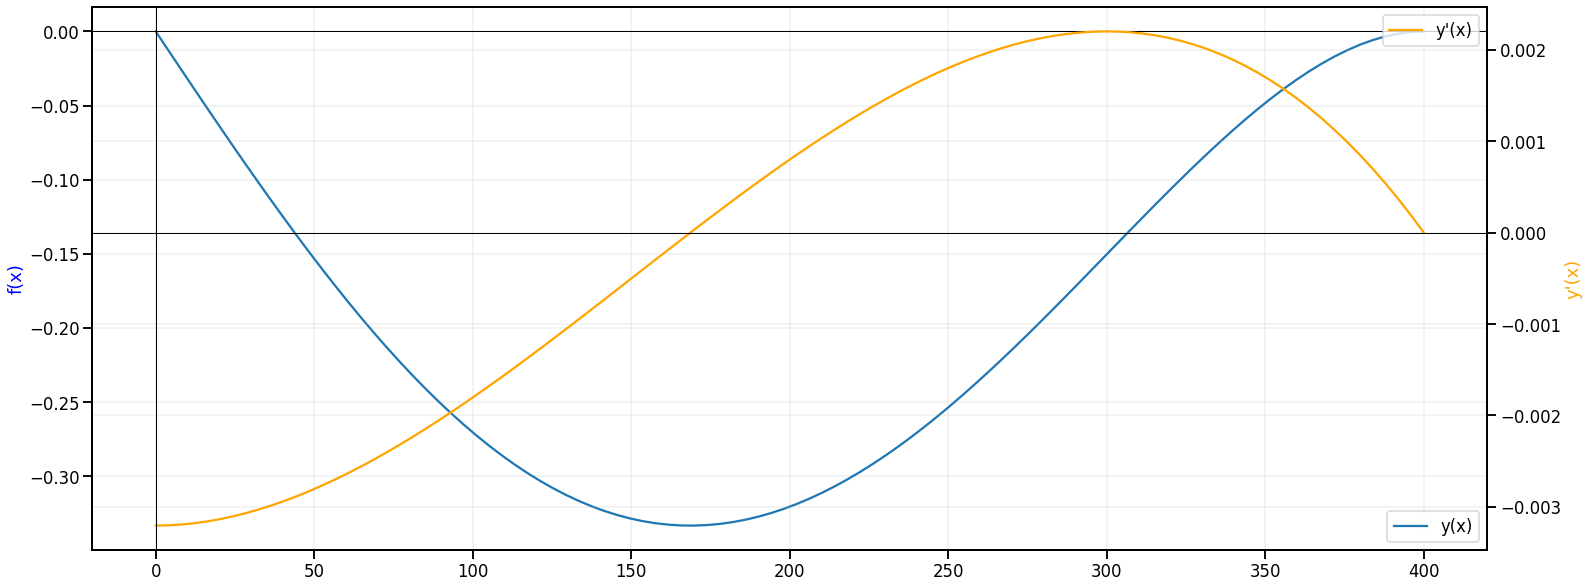

In [ ]:
#(a) plot function and dy/dx vs x

x0 = 0
x1 = 0.9*L 

x = np.linspace(0,L,100)

sb.set_context('talk')
fig,axes = plt.subplots(1,1,figsize=(25,10))
ax = axes
ax.plot(x,deflection(x),label='y(x)')
myax(ax)
ax.set_ylabel('f(x)',color='b')
ax2 = ax.twinx()
ax2.plot(x,ForwardFiniteDiff(deflection,x),label="y'(x)",c='orange')
ax2.set_ylabel("y'(x)",color='orange') 
myax(ax2)


39 bisections required for a tolerance of 1e-09.
Error
numerical root = 168.61406564712524
approx. error  = 1.2725908741235827e-05%


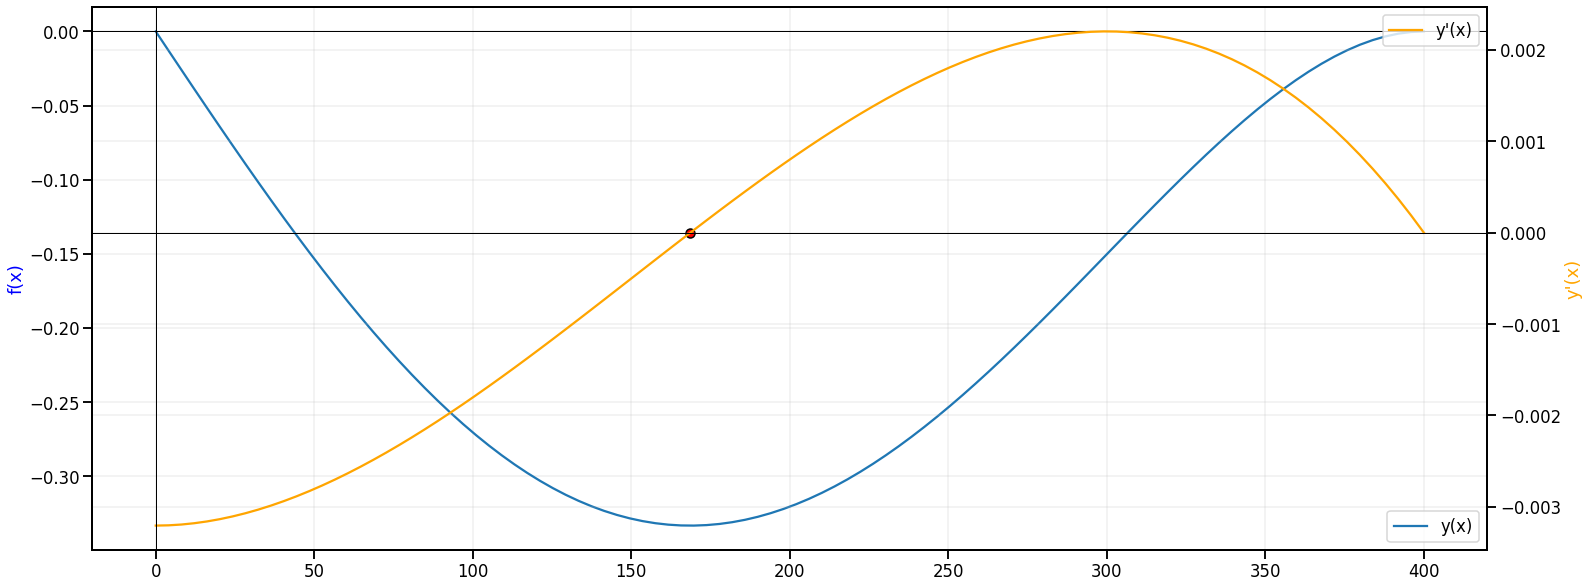

In [ ]:
# df/dx (analytical)

def dfdx(x): 
  return ForwardFiniteDiff(deflection,x,)

xr, res = bisection_root(dfdx,0,0.9*L,tol=1e-9)
res

sb.set_context('talk')
fig,axes = plt.subplots(1,1,figsize=(25,10))
ax = axes
ax.plot(x,deflection(x),label='y(x)')
myax(ax)
ax.set_ylabel('f(x)',color='b')
ax2 = ax.twinx()
ax2.plot(x,ForwardFiniteDiff(deflection,x),label="y'(x)",c='orange')
ax2.set_ylabel("y'(x)",color='orange') 
ax2.scatter(xr,dfdx(xr),color='r',ec='k')
myax(ax2)